In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [3]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}


In [3]:
path = "Friday-WorkingHours-Afternoon-DDos.csv"
df = pd.read_csv(path)

#Adding Attack Type column
#df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

C:\Users\Mohab\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [13]:
df.shape

(225745, 79)

In [10]:
df['Label'].value_counts()

KeyError: 'Label'

In [14]:
df['Attack Type'].value_counts()

KeyError: 'Attack Type'

In [15]:
df.dtypes

 Destination Port                int64
 Flow Duration                   int64
 Total Fwd Packets               int64
 Total Backward Packets          int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
 Idle Std                      float64
 Idle Max                        int64
 Idle Min                        int64
 Label                          object
Length: 79, dtype: object

In [17]:
df.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [10]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['service', 'protocol_type', 'flag']

In [11]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

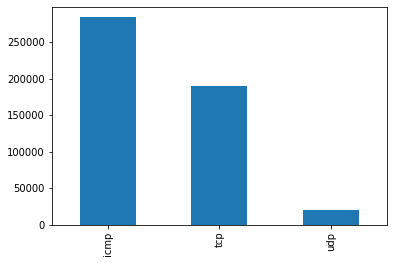

In [12]:
bar_graph('protocol_type')

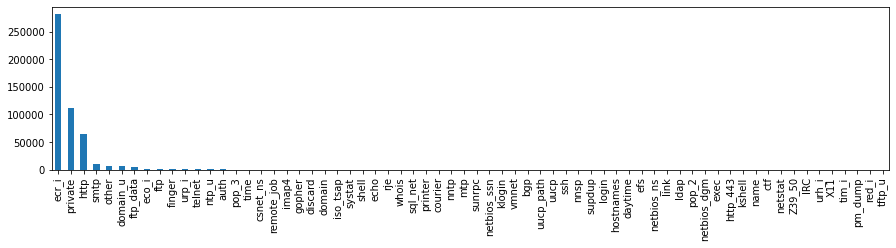

In [13]:
plt.figure(figsize=(15,3))
bar_graph('service')

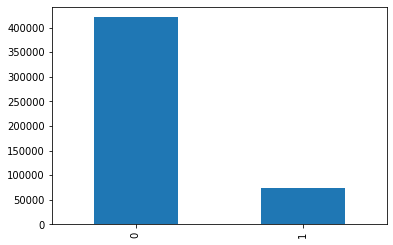

In [14]:
bar_graph('logged_in')

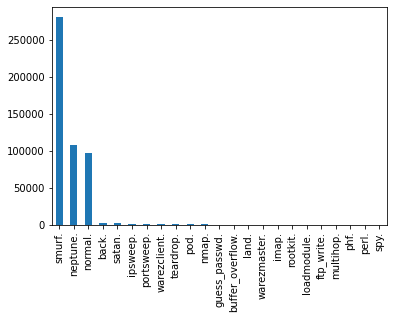

In [15]:
bar_graph('target')

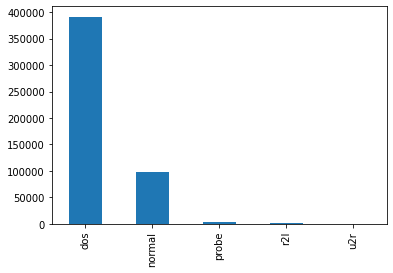

In [16]:
bar_graph('Attack Type')

In [17]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

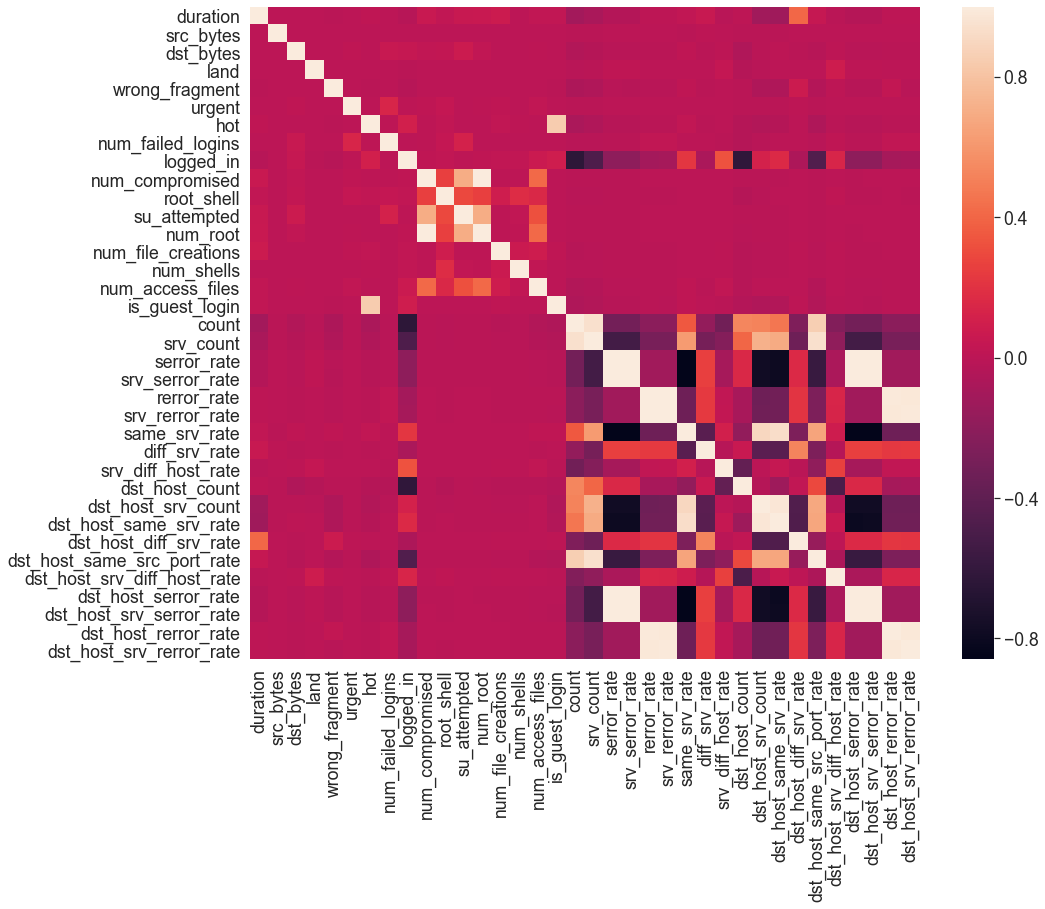

In [44]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)
sns.set(font_scale=1.6)


plt.show()

In [19]:
#only_na = df[np.invert(df.index.isin(na_free.index))]
df_nafree = df[[col for col in df if df[col].nunique() > 1]]
df1 = df_nafree.columns.values
df2 = df.columns.values
print(df1)

main_list = np.setdiff1d(df2,df1)
print(main_list)

['duration' 'protocol_type' 'service' 'flag' 'src_bytes' 'dst_bytes'
 'land' 'wrong_fragment' 'urgent' 'hot' 'num_failed_logins' 'logged_in'
 'num_compromised' 'root_shell' 'su_attempted' 'num_root'
 'num_file_creations' 'num_shells' 'num_access_files' 'is_guest_login'
 'count' 'srv_count' 'serror_rate' 'srv_serror_rate' 'rerror_rate'
 'srv_rerror_rate' 'same_srv_rate' 'diff_srv_rate' 'srv_diff_host_rate'
 'dst_host_count' 'dst_host_srv_count' 'dst_host_same_srv_rate'
 'dst_host_diff_srv_rate' 'dst_host_same_src_port_rate'
 'dst_host_srv_diff_host_rate' 'dst_host_serror_rate'
 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
 'dst_host_srv_rerror_rate' 'target' 'Attack Type']
[]


In [20]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
dst_host_srv_rerror_rate            0.230140
dst_host_rerror_rate                0.230590
rerror_rate                         0.231623
srv_rerror_rate                     0.232147
logged_in                           0.355345
dst_host_serror_rate                0.380593
serror_rate                         0.380717
dst_host_srv_serror_rate            0.380919
srv_serror

In [21]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [22]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [23]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [25]:
df['service'] = encoder.fit_transform(df['service'])
df['Attack Type'] = encoder.fit_transform(df['Attack Type'])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,1,22,0,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,1
1,0,1,22,0,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,1
2,0,1,22,0,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,1
3,0,1,22,0,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,1
4,0,1,22,0,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,1


In [26]:
#df.drop('service',axis = 1,inplace= True)

In [27]:
df.shape

(494021, 41)

df.head

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [29]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 40)
(330994, 39) (163027, 39)
(330994, 1) (163027, 1)


In [30]:
#KNearestNeighbor starts here
#from sklearn.neighbors import KNeighborsClassifier

#knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

#start_time = time.time()
#knn.fit(X_train, Y_train.values.ravel())
#end_time = time.time()
#print("Training time: ",end_time-start_time)

In [31]:
#KNN testing time
#start_time = time.time()
#Y_test_pred1 = knn.predict(X_test)
#end_time = time.time()
#print("Testing time: ",end_time-start_time)

In [32]:
#KNN Training time
#print("Train score is:", knn.score(X_train, Y_train))
#print("Test score is:",knn.score(X_test,Y_test))

In [33]:
df.shape

(494021, 40)

In [34]:
import sklearn
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [35]:
x=df.iloc[:,0:38]
y=df.iloc[:,[-1]]

In [36]:
x.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate
0,0,1,22,0,181,5450,0,0,0,0,...,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0
1,0,1,22,0,239,486,0,0,0,0,...,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0
2,0,1,22,0,235,1337,0,0,0,0,...,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0
3,0,1,22,0,219,1337,0,0,0,0,...,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0
4,0,1,22,0,217,2032,0,0,0,0,...,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0


In [37]:
y.head()

,Attack Type
0,1
1,1
2,1
3,1
4,1


In [52]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=13)

In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [54]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [55]:
#SupportVectorMachine starts here
clf=svm.SVC()

In [56]:
start_time = time.time()
clf.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  66.87881231307983


In [57]:
start_time = time.time()
Y_test_pred_SVM = clf.predict(x_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  6.57898211479187


In [58]:
print("Train score is:", clf.score(x_train, y_train))
print("Test score is:",clf.score(x_test,y_test))

Train score is: 0.9993218898020323
Test score is: 0.9991194777592227


In [59]:
pred_clf=clf.predict(x_test)

In [61]:
sklearn.metrics.accuracy_score(y_test, Y_test_pred_SVM)

0.9991194777592227

In [60]:
print(sklearn.metrics.classification_report(y_test, Y_test_pred_SVM))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78439
           1       1.00      1.00      1.00     19260
           2       1.00      0.98      0.99       872
           3       0.93      0.91      0.92       223
           4       1.00      0.18      0.31        11

    accuracy                           1.00     98805
   macro avg       0.98      0.82      0.84     98805
weighted avg       1.00      1.00      1.00     98805



In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
start_time = time.time()
knn.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  263.7095549106598


In [64]:
start_time = time.time()
pred_knn=knn.predict(x_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  226.44102311134338


In [65]:
sklearn.metrics.accuracy_score(y_test, pred_knn)

0.9995243155710744

In [66]:
print(sklearn.metrics.classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78439
           1       1.00      1.00      1.00     19260
           2       1.00      0.99      0.99       872
           3       0.95      0.96      0.95       223
           4       0.83      0.45      0.59        11

    accuracy                           1.00     98805
   macro avg       0.96      0.88      0.91     98805
weighted avg       1.00      1.00      1.00     98805



In [149]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [150]:
start_time = time.time()
NB.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  0.5004532337188721


In [152]:
start_time = time.time()
Y_test_pred_NB = NB.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.38935327529907227


In [153]:
print("Train score is:", NB.score(X_train, Y_train))
print("Test score is:",NB.score(X_test,Y_test))

Train score is: 0.87939056297093
Test score is: 0.8791672545038552


In [154]:
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_NB))

              precision    recall  f1-score   support

         dos       0.98      0.94      0.96    129106
      normal       0.97      0.64      0.77     32167
       probe       0.09      0.99      0.17      1348
         r2l       0.29      0.39      0.33       387
         u2r       0.01      0.74      0.01        19

    accuracy                           0.88    163027
   macro avg       0.47      0.74      0.45    163027
weighted avg       0.97      0.88      0.91    163027



In [155]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [156]:
start_time = time.time()
DT.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  1.106003761291504


In [157]:
start_time = time.time()
Y_test_pred_DT = DT.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.024021387100219727


In [158]:
print("Train score is:", DT.score(X_train, Y_train))
print("Test score is:",DT.score(X_test,Y_test))
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_DT))

Train score is: 0.9905255080152511
Test score is: 0.990437166849663


C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         dos       1.00      1.00      1.00    129106
      normal       0.98      0.98      0.98     32167
       probe       0.55      0.90      0.68      1348
         r2l       0.00      0.00      0.00       387
         u2r       0.00      0.00      0.00        19

    accuracy                           0.99    163027
   macro avg       0.51      0.57      0.53    163027
weighted avg       0.99      0.99      0.99    163027



In [159]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=30)

In [160]:
start_time = time.time()
RF.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  7.112467050552368


In [161]:
start_time = time.time()
Y_test_pred_RF = RF.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.39135241508483887


In [162]:
print("Train score is:", RF.score(X_train, Y_train))
print("Test score is:",RF.score(X_test,Y_test))
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_RF))

Train score is: 0.9999788515803912
Test score is: 0.9997301060560521
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00    129106
      normal       1.00      1.00      1.00     32167
       probe       1.00      0.99      0.99      1348
         r2l       0.98      0.96      0.97       387
         u2r       0.93      0.68      0.79        19

    accuracy                           1.00    163027
   macro avg       0.98      0.93      0.95    163027
weighted avg       1.00      1.00      1.00    163027



In [163]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=1200000)

In [164]:
start_time = time.time()
LR.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training time:  12.738579034805298


In [165]:
start_time = time.time()
Y_test_pred_LR = LR.predict(X_test)
end_time = time.time()

print("Testing time: ",end_time-start_time)

Testing time:  0.025022029876708984


In [166]:
print("Train score is:", LR.score(X_train, Y_train))
print("Test score is:",LR.score(X_test,Y_test))
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_LR))

Train score is: 0.9941237605515508
Test score is: 0.9941972802051194
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00    129106
      normal       0.98      1.00      0.99     32167
       probe       0.98      0.90      0.94      1348
         r2l       0.84      0.82      0.83       387
         u2r       0.86      0.32      0.46        19

    accuracy                           0.99    163027
   macro avg       0.93      0.81      0.84    163027
weighted avg       0.99      0.99      0.99    163027



In [167]:
#GRADIENT BOOSTING CLASSIFIER

from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=0)

In [168]:
start_time = time.time()
GBC.fit(X_train, Y_train.values.ravel())
end_time = time.time()

print("Training time: ",end_time-start_time)

Training time:  353.7887005805969


In [169]:
start_time = time.time()
Y_test_pred_GBC = GBC.predict(X_test)
end_time = time.time()

print("Testing time: ",end_time-start_time)

Testing time:  1.2040956020355225


In [170]:
print("Train score is:", GBC.score(X_train, Y_train))
print("Test score is:", GBC.score(X_test,Y_test))
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_GBC))

Train score is: 0.9871961425282634
Test score is: 0.9871064302232145
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00    129106
      normal       1.00      0.95      0.97     32167
       probe       1.00      0.65      0.78      1348
         r2l       0.13      0.77      0.23       387
         u2r       0.28      0.79      0.42        19

    accuracy                           0.99    163027
   macro avg       0.68      0.83      0.68    163027
weighted avg       1.00      0.99      0.99    163027



In [171]:
#Keras Classifier
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [177]:
def fun():
    model = Sequential()
    
    #here 30 is output dimension
    model.add(Dense(39,input_dim =39,activation = 'relu',kernel_initializer='random_uniform'))
    
    #in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))
    
    #5 classes-normal,dos,probe,r2l,u2r
    model.add(Dense(5,activation='softmax'))
    
    #loss is categorical_crossentropy which specifies that we have multiple classes
    
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    
    return model

In [178]:
KC = KerasClassifier(build_fn=fun,epochs=100,batch_size=64)

In [179]:
start = time.time()
KC.fit(X_train, Y_train.values.ravel())
end = time.time()


Epoch 1/100
330994/330994 [==============================] - 3s 9us/step - loss: 0.3182 - accuracy: 0.9321
Epoch 2/100
330994/330994 [==============================] - 3s 9us/step - loss: 0.0812 - accuracy: 0.9846
Epoch 3/100
330994/330994 [==============================] - 3s 9us/step - loss: 0.0664 - accuracy: 0.9847
Epoch 4/100
330994/330994 [==============================] - 3s 9us/step - loss: 0.0615 - accuracy: 0.9847
Epoch 5/100
330994/330994 [==============================] - 3s 9us/step - loss: 0.0585 - accuracy: 0.9847
Epoch 6/100
330994/330994 [==============================] - 3s 9us/step - loss: 0.0559 - accuracy: 0.9847
Epoch 7/100
330994/330994 [==============================] - 3s 9us/step - loss: 0.0483 - accuracy: 0.9850
Epoch 8/100
330994/330994 [==============================] - 3s 9us/step - loss: 0.0376 - accuracy: 0.9869
Epoch 9/100
330994/330994 [==============================] - 3s 9us/step - loss: 0.0308 - accuracy: 0.9896
Epoch 10/100
330994/330994 [========

In [180]:
print('Training time')
print((end-start))

Training time
300.86636543273926


In [181]:
start_time = time.time()
Y_test_pred_KC = KC.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.5064609050750732


In [182]:
start_time = time.time()
Y_train_pred_KC = KC.predict(X_train)
end_time = time.time()
print(accuracy_score(Y_train,Y_train_pred_KC))
print(accuracy_score(Y_test,Y_test_pred_KC))

0.9994894167265872
0.9991473804952554


In [183]:
print(sklearn.metrics.classification_report(Y_test, Y_test_pred_KC))

C:\Users\Mohab\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         dos       1.00      1.00      1.00    129106
      normal       1.00      1.00      1.00     32167
       probe       0.99      0.98      0.99      1348
         r2l       0.86      0.89      0.87       387
         u2r       0.00      0.00      0.00        19

    accuracy                           1.00    163027
   macro avg       0.77      0.77      0.77    163027
weighted avg       1.00      1.00      1.00    163027

